# EXAMPLE 6.5

In [1]:
import numpy as np

lam = 2.0
T = 5.0
rng = np.random.default_rng(42)
n_eventos = rng.poisson(lam * T)  # N(T) ~ Poisson(λT)
print(n_eventos)


13


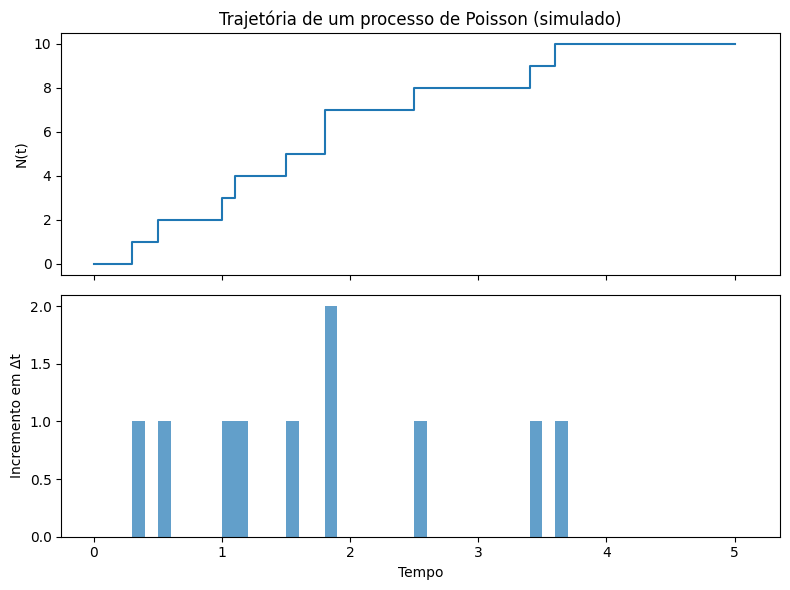

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2.0          # taxa por unidade de tempo
T = 5.0            # horizonte
dt = 0.1           # passo de tempo (quanto menor, mais fino)
rng = np.random.default_rng(42)

# incrementos independentes ~ Poisson(λ·Δt)
n_steps = int(T / dt)
increments = rng.poisson(lam * dt, size=n_steps)

# contagem acumulada N(t)
counts = np.cumsum(increments)
times = np.linspace(dt, T, n_steps)  # tempos em que cada incremento se aplica

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# gráfico da trajetória do processo
ax[0].step(np.insert(times, 0, 0.0), np.insert(counts, 0, 0), where="post")
ax[0].set_ylabel("N(t)")
ax[0].set_title("Trajetória de um processo de Poisson (simulado)")

# gráfico dos incrementos por passo
ax[1].bar(times, increments, width=dt, align="edge", alpha=0.7)
ax[1].set_ylabel("Incremento em Δt")
ax[1].set_xlabel("Tempo")

plt.tight_layout()
plt.show()


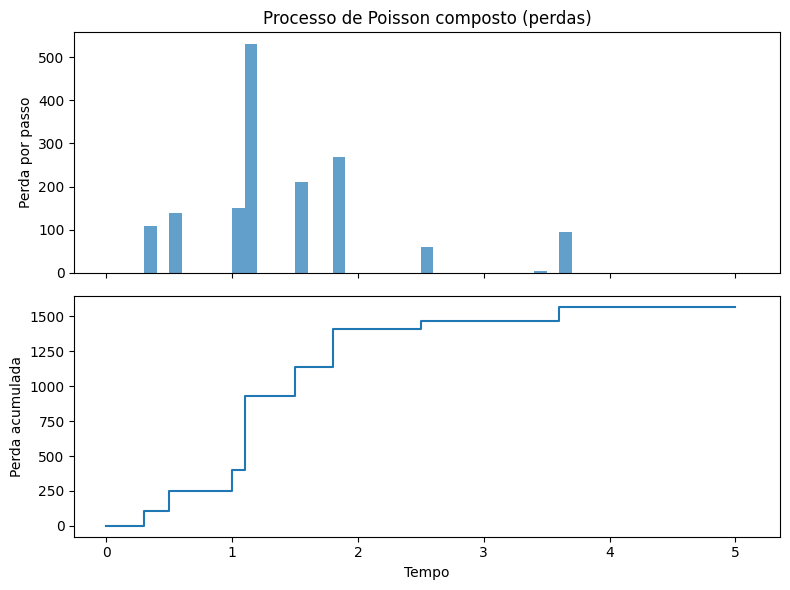

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2.0          # taxa de chegada por unidade de tempo
T = 5.0            # horizonte
dt = 0.1           # passo de tempo
mean_loss = 100.0  # média da severidade (escala da exponencial)
rng = np.random.default_rng(42)

n_steps = int(T / dt)
times = np.linspace(dt, T, n_steps)

# eventos por passo
counts = rng.poisson(lam * dt, size=n_steps)

# perdas por passo: soma de severidades de cada evento
step_losses = np.array([
    rng.exponential(mean_loss, size=k).sum() if k > 0 else 0.0
    for k in counts
])

cum_losses = np.cumsum(step_losses)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax[0].bar(times, step_losses, width=dt, align="edge", alpha=0.7, label="Perda em Δt")
ax[0].set_ylabel("Perda por passo")
ax[0].set_title("Processo de Poisson composto (perdas)")

ax[1].step(np.insert(times, 0, 0.0), np.insert(cum_losses, 0, 0.0),
           where="post", label="Perda acumulada")
ax[1].set_xlabel("Tempo")
ax[1].set_ylabel("Perda acumulada")

plt.tight_layout()
plt.show()


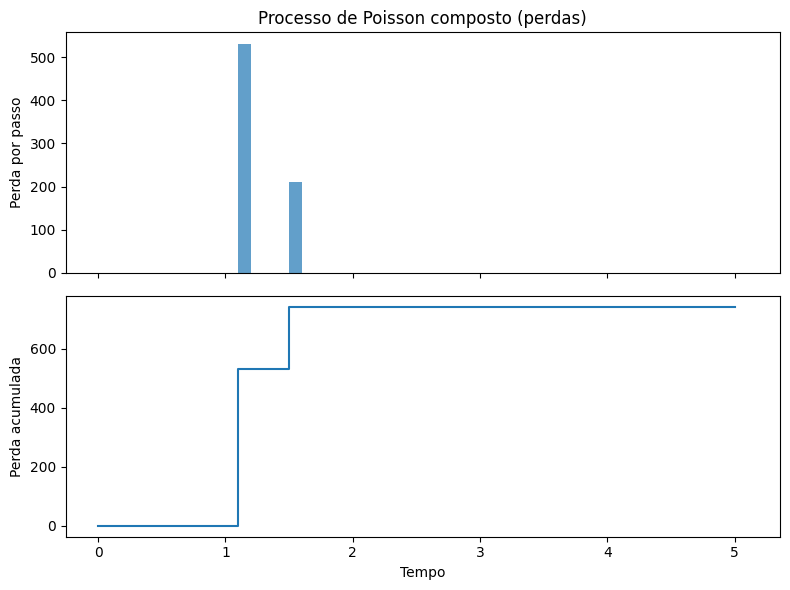

In [19]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2.0          # taxa de chegada por unidade de tempo
T = 5.0            # horizonte
dt = 0.1           # passo de tempo
mean_loss = 100.0  # média da severidade (escala da exponencial)
rng = np.random.default_rng(42)

n_steps = int(T / dt)
times = np.linspace(dt, T, n_steps)

# eventos por passo
counts = rng.poisson(lam * dt, size=n_steps)

# perdas por passo: soma de severidades de cada evento
step_losses = np.array([
    np.where((vals := rng.exponential(mean_loss, size=k)) > 200, vals, 0.0).sum()
    if k > 0 else 0.0
    for k in counts
])


cum_losses = np.cumsum(step_losses)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax[0].bar(times, step_losses, width=dt, align="edge", alpha=0.7, label="Perda em Δt")
ax[0].set_ylabel("Perda por passo")
ax[0].set_title("Processo de Poisson composto (perdas)")

ax[1].step(np.insert(times, 0, 0.0), np.insert(cum_losses, 0, 0.0),
           where="post", label="Perda acumulada")
ax[1].set_xlabel("Tempo")
ax[1].set_ylabel("Perda acumulada")

plt.tight_layout()
plt.show()

In [18]:
rng.exponential(mean_loss, size=2)

array([ 62.13830875, 150.79613751])